<a href="https://colab.research.google.com/github/Pontessxx/OceansGate-GS-DataScience/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

usarei pandas seaborn matplotlib e geopandas

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=FutureWarning)

## Importando os dados

In [3]:
cities_data = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/Cities1.csv')
who_pm_data = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/WHO_PM.csv')

# Analise dos dados <p style='color: gray;'>cities_data</p>

In [4]:
display(cities_data)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


### sobre as colunas e seus dados

In [5]:
# Verificar a estrutura e os tipos de dados
print("\nEstrutura do Cities1.csv:")
print(cities_data.info())



Estrutura do Cities1.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB
None


podemos ver que temos 3 colunas de strings(object) e 2 colunas de float as quais possuem o nome de "Qualidade do Ar" e "Poluição da agua"

In [6]:
# Verificar valores nulos
print("\nValores nulos no Cities1.csv:")
print(cities_data.isnull().sum())


Valores nulos no Cities1.csv:
City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64


Nos valores nulos observamos 425 linhas, filtrei o dataframe para observar as cidades que possuem Região em valores nulos

In [19]:
cities_data[cities_data['Region'].isna()]

,City,Region,Country,AirQuality,WaterPollution
3,Berlin,NaN,Germany,62.364130,28.612717
8,Basel,NaN,Switzerland,81.666667,26.923077
17,Vilnius,NaN,Lithuania,77.247191,20.588235
18,Monaco,NaN,Monaco,28.787879,61.363636
19,Brussels,NaN,Belgium,35.810811,44.761905
...,...,...,...,...,...
3896,Croton,NaN,Italy,62.500000,50.000000
3907,Dudelange,NaN,Luxembourg,66.666667,62.500000
3929,Siping,NaN,People's Republic of China,0.000000,50.000000
3944,Loures,NaN,Portugal,100.000000,50.000000


Aplicarei uma função para descrever as colunas e conseguir saber o desvio padrao, media, quantidade de valores, minimos e maximos e seus quartis

#1 Descrição do projeto e das variaveis (10 pontos)
Na descrição das variaveis o ideal é que sejam descritos o tipo número de valores nulos e como cada um dos atributos está distribuído

- 'Region' : Tipo object, coluna referente a regiões as quais estão presente no nosso mundo. Importante lembrar que esta coluna possuem valores NaN
- 'City' : Tipo object, coluna de cidades as quais estão dentro de regioes.
- 'Contry' : coluna responsável pelo pais, do tipo object.
- 'AirQuality' : Tipo float, coluna numerica com valores de 0-100 indo da pior qualidade do ar até a boa.
- 'WaterPollution' : Tipo float, coluna de valores numericos de 0-100 indo de 0 uma poluição baixa até 100 poluição maxima


**Valores nulos**

Valores nulos no Cities1.csv:
- City                0
- Region            425
- Country             0
- AirQuality          0
- WaterPollution      0

</br>
Visto isso sabemosque há valores nulos os quais pertencem a coluna região

In [8]:
print("\nEstatísticas descritivas do Cities1.csv:")
print(cities_data.describe())


Estatísticas descritivas do Cities1.csv:
        AirQuality  WaterPollution
count  3963.000000     3963.000000
mean     62.253452       44.635372
std      30.944753       25.663910
min       0.000000        0.000000
25%      37.686567       25.000000
50%      69.444444       50.000000
75%      87.500000       57.719393
max     100.000000      100.000000


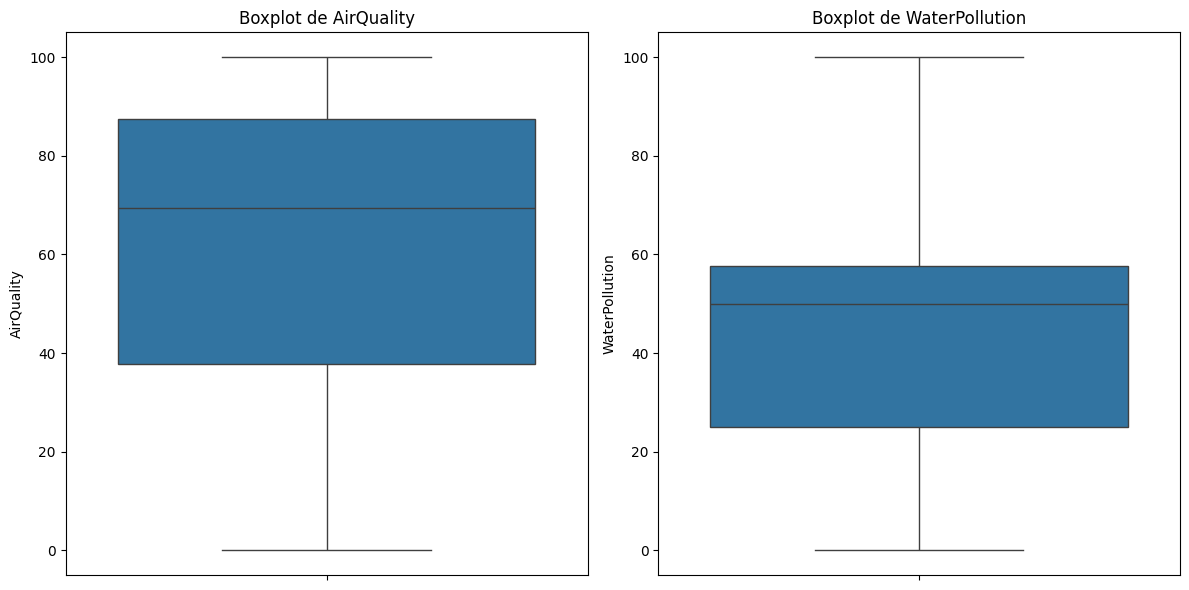

In [37]:
# Plotar boxplot para AirQuality e WaterPollution
plt.figure(figsize=(12, 6))

# Boxplot para AirQuality
plt.subplot(1, 2, 1)
sns.boxplot(y=cities_data['AirQuality'])
plt.title('Boxplot de AirQuality')
plt.ylabel('AirQuality')

# Boxplot para WaterPollution
plt.subplot(1, 2, 2)
sns.boxplot(y=cities_data['WaterPollution'])
plt.title('Boxplot de WaterPollution')
plt.ylabel('WaterPollution')

plt.tight_layout()
plt.show()

In [39]:
cities_data[['AirQuality','WaterPollution']].median()

AirQuality        69.444444
WaterPollution    50.000000
dtype: float64

### Conclusões através do boxplot
Com este plot podemos saber se há ou não outliers, estes são responsáveis por gerar modelos preditivos ou aprendizados de máquinas com 'overfit'. Traduzindo ao aplicar algum algoritimo estes outliers acabam influenciando e fazendo com que o modelo fique muito especifico e quando aplicado em testes acabam saindo mal por se restringirem e adequarem tanto aos dados de treino

## Criando um mapa para melhor visibilidade e compreenção dos dados

In [11]:
result_df = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/locations.csv')

In [12]:
result_df

,City,latitude,longitude
0,New York City,40.71453,-74.00712
1,"Washington, D.C.",38.89037,-77.03196
2,San Francisco,37.77712,-122.41966
3,Berlin,52.51604,13.37691
4,Los Angeles,34.05357,-118.24545
...,...,...,...
3791,Jubail,27.01740,49.62251
3792,Yanbu,24.08954,38.06180
3793,Vic,23.73060,-99.15136
3794,Segovia,40.94847,-4.11648


In [13]:
df = cities_data.merge(right=result_df, on='City', how='inner')
df.head()

,City,Region,Country,AirQuality,WaterPollution,latitude,longitude
0,New York City,New York,United States of America,46.816038,49.504950,40.71453,-74.00712
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,38.89037,-77.03196
2,San Francisco,California,United States of America,60.514019,43.000000,37.77712,-122.41966
3,Berlin,NaN,Germany,62.364130,28.612717,52.51604,13.37691
4,Los Angeles,California,United States of America,36.621622,61.299435,34.05357,-118.24545


In [15]:
from plotly.express import scatter_mapbox
scatter_mapbox(height=900, mapbox_style='open-street-map', data_frame=df, lat='latitude', lon='longitude', hover_name='City', hover_data=['Country'], color='AirQuality', zoom=1,).show()

### Mapa da coluna 'WatterPoluction'

In [16]:
scatter_mapbox(height=900, mapbox_style='open-street-map', data_frame=df, lat='latitude', lon='longitude', hover_name='City', hover_data=['Country'], color='WaterPollution', zoom=1,).show()

## Considerações através do mapa ( filtrando Brazil )
é possivel vizualizar que no mapa de qualidade do ar as cidades da america do norte e europa possuem valores considerados altos.
 Já no mapa de poluição da agua vemos que estes possuem maiores pontos com uma pontuação media

In [78]:
# 5 cidades no Brasil com maior qualidade do ar (AirQuality <= 69.444444)
brazil_data = cities_data[cities_data['Country'] == 'Brazil']
filtered_air_quality_brazil = brazil_data[brazil_data['AirQuality'] <= 69.444444]
highest_air_quality_brazil = brazil_data.sort_values(by='AirQuality', ascending=True).head(5)
print("5 cidades no Brasil com maior qualidade do ar:")
display(highest_air_quality_brazil[['City', 'Region', 'AirQuality']])
print('\n')

# 5 cidades no Brasil com maior poluição da água (WaterPollution <= 50)
filtered_water_pollution_brazil = brazil_data[brazil_data['WaterPollution'] <= 50]
highest_water_pollution_brazil = brazil_data.sort_values(by='WaterPollution', ascending=False).head(5)
print("5 cidades no Brasil com maior poluição da água:")
display(highest_water_pollution_brazil[['City','Region', 'WaterPollution']])


5 cidades no Brasil com maior qualidade do ar:


,City,Region,AirQuality
2510,Sao Joao de Meriti,Rio de Janeiro,0.000000
3089,Limeira,Sao Paulo,12.500000
1934,Duque de Caxias,Rio de Janeiro,12.500000
16,Sao Paulo,Sao Paulo,24.056604
3221,Serra,Espirito Santo,25.000000




5 cidades no Brasil com maior poluição da água:


,City,Region,WaterPollution
3632,Rio das Ostras,Rio de Janeiro,100.0
799,Sao Luis,Maranhao,100.0
2923,Sao Leopoldo,Rio Grande do Sul,100.0
2309,Teixeira de Freitas,Bahia,100.0
3621,Linhares,Espirito Santo,100.0


In [94]:
# Filtrar os dados para a região de São Paulo
sao_paulo_region = cities_data[cities_data['Region'] == 'Sao Paulo']

# Plotar histograma para AirQuality
plt.figure(figsize=(20, 6))


# Plotar histograma para AirQuality usando Plotly
fig = px.bar(sao_paulo_region.sort_values('AirQuality'), x='City', y='AirQuality', title='Qualidade do Ar nas Cidades da Região de São Paulo')
fig.update_layout(xaxis_title='Cidade', yaxis_title='Qualidade do Ar', xaxis_tickangle=-45)
fig.show()


<Figure size 2000x600 with 0 Axes>

In [96]:
# Plotar histograma para WaterPollution usando Plotly
fig = px.bar(sao_paulo_region.sort_values('AirQuality'), x='City', y='WaterPollution', title='Poluição da Água nas Cidades da Região de São Paulo')
fig.update_layout(xaxis_title='Cidade', yaxis_title='Poluição da Água', xaxis_tickangle=-45)
fig.show()

In [98]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency, f_oneway

Correlação de Pearson entre AirQuality e WaterPollution: -0.45417262259393204
Correlação de Spearman entre AirQuality e WaterPollution: -0.44576006330811335


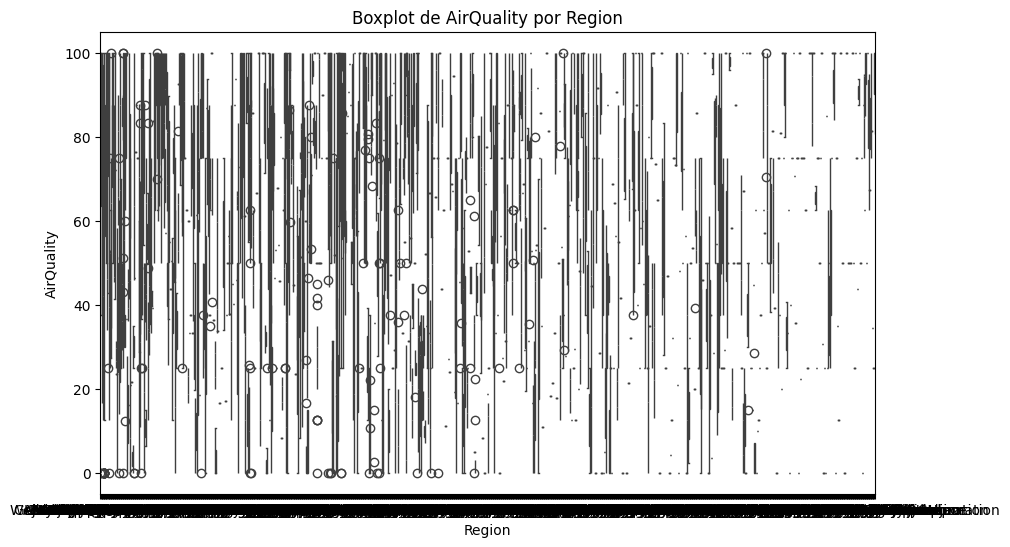

Resultado da ANOVA para AirQuality por Region:
F-statistic: 5.27423891576571, p-value: 1.470769777844612e-256
Teste Qui-Quadrado entre Region e Country:
Chi2: 519602.8102857142, p-value: 0.0


In [101]:
# Numérica x Numérica: Correlação de Pearson e Spearman
def calcular_correlacao(df, col1, col2):
    pearson_corr, _ = pearsonr(df[col1], df[col2])
    spearman_corr, _ = spearmanr(df[col1], df[col2])
    print(f"Correlação de Pearson entre {col1} e {col2}: {pearson_corr}")
    print(f"Correlação de Spearman entre {col1} e {col2}: {spearman_corr}")

# Exemplo de correlação
calcular_correlacao(cities_data, 'AirQuality', 'WaterPollution')

# Categórica x Numérica: Boxplot e ANOVA
def plotar_boxplot_anova(df, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Boxplot de {num_col} por {cat_col}')
    plt.show()

    # ANOVA
    groups = df.groupby(cat_col)[num_col].apply(list)
    anova_result = f_oneway(*groups)
    print(f"Resultado da ANOVA para {num_col} por {cat_col}:")
    print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Exemplo de Boxplot e ANOVA
plotar_boxplot_anova(cities_data, 'Region', 'AirQuality')

# Categórica x Categórica: Tabela de contingência e Chi-square
def calcular_chi_square(df, col1, col2):
    contigencia = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contigencia)
    print(f"Teste Qui-Quadrado entre {col1} e {col2}:")
    print(f"Chi2: {chi2}, p-value: {p}")

# Exemplo de Chi-square
calcular_chi_square(cities_data, 'Region', 'Country')

In [102]:
# Matriz de Correlação
def matriz_correlacao(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlação')
    plt.show()

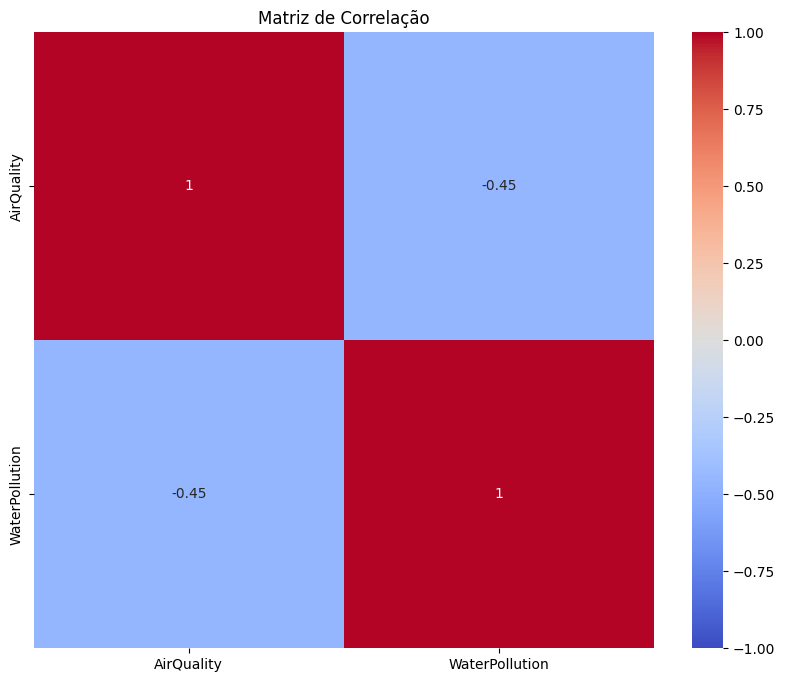

In [103]:
# Exibir matriz de correlação
matriz_correlacao(cities_data[['AirQuality','WaterPollution',]])

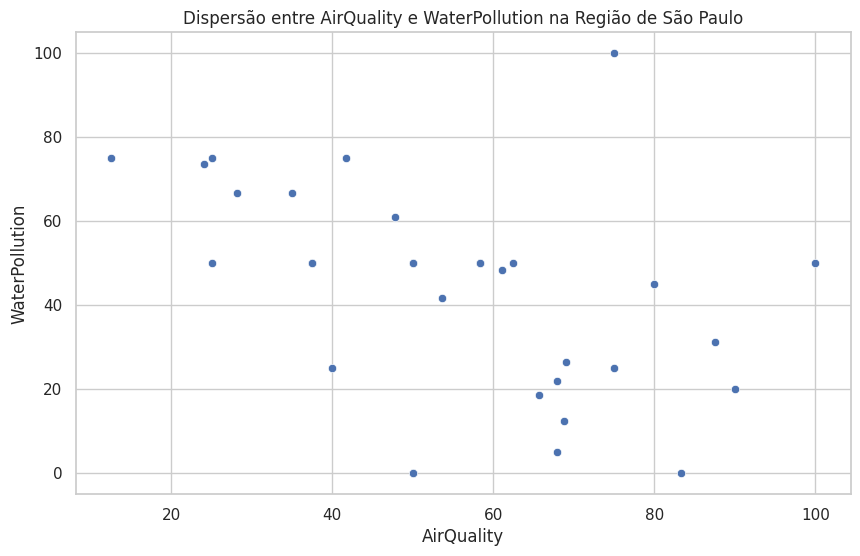

Correlação de Pearson entre AirQuality e WaterPollution: -0.4492734686394219
Correlação de Spearman entre AirQuality e WaterPollution: -0.5402927303410596


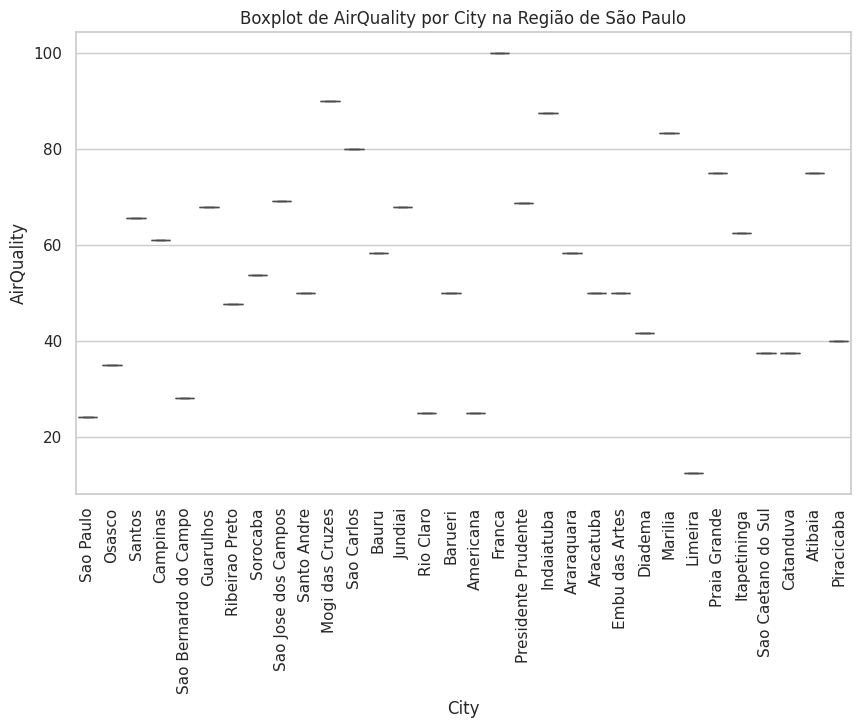

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning:

all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.



Resultado da ANOVA para AirQuality por City:
F-statistic: nan, p-value: nan


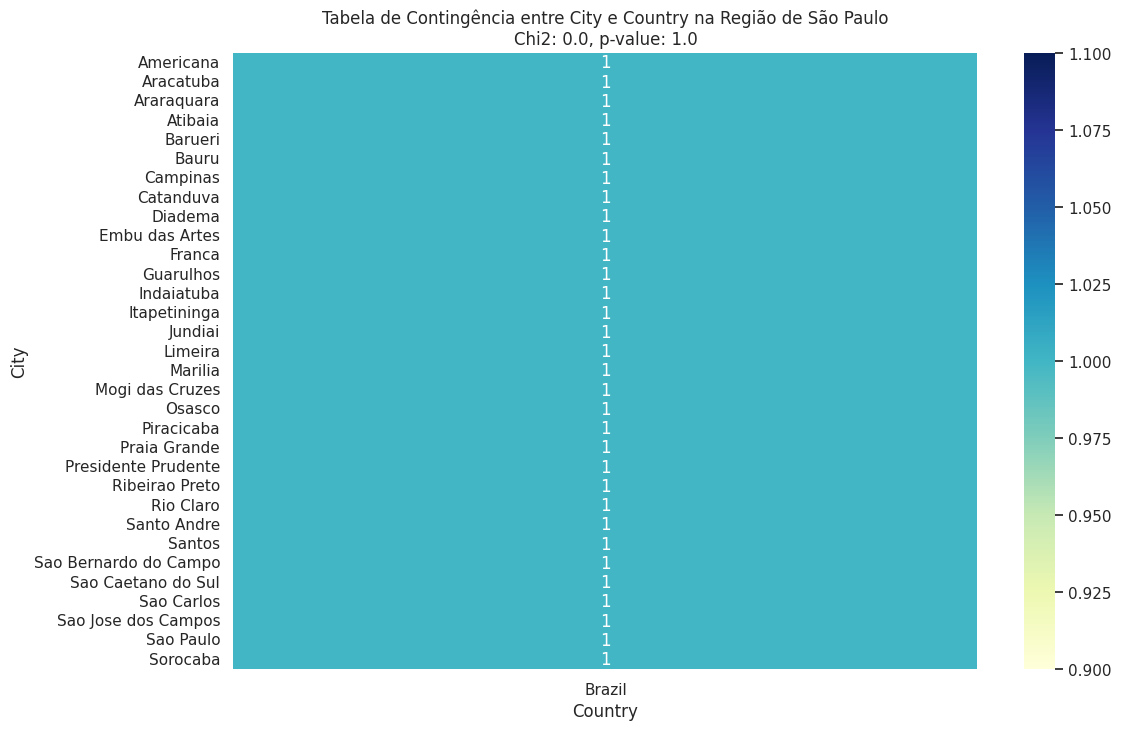

In [107]:


# Configurações de estilo
sns.set(style="whitegrid")

# 1. Gráfico de dispersão para correlação de Pearson e Spearman
def plotar_correlacao(df, col1, col2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.title(f'Dispersão entre {col1} e {col2} na Região de São Paulo')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    # Correlação de Pearson
    pearson_corr, _ = pearsonr(df[col1], df[col2])
    print(f"Correlação de Pearson entre {col1} e {col2}: {pearson_corr}")

    # Correlação de Spearman
    spearman_corr, _ = spearmanr(df[col1], df[col2])
    print(f"Correlação de Spearman entre {col1} e {col2}: {spearman_corr}")

plotar_correlacao(sao_paulo_region, 'AirQuality', 'WaterPollution')

# 2. Boxplot e ANOVA para categórica x numérica
def plotar_boxplot_anova(df, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Boxplot de {num_col} por {cat_col} na Região de São Paulo')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.xticks(rotation=90)
    plt.show()

    # ANOVA
    if df[cat_col].nunique() > 1:  # Verificar se há mais de um grupo
        groups = df.groupby(cat_col)[num_col].apply(list)
        anova_result = f_oneway(*groups)
        print(f"Resultado da ANOVA para {num_col} por {cat_col}:")
        print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")
    else:
        print(f"ANOVA não pode ser realizada, apenas um grupo encontrado em {cat_col}.")

plotar_boxplot_anova(sao_paulo_region, 'City', 'AirQuality')

# 3. Heatmap para teste Qui-Quadrado entre variáveis categóricas
def plotar_chi_square_heatmap(df, col1, col2):
    contigencia = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contigencia)

    plt.figure(figsize=(12, 8))
    sns.heatmap(contigencia, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f'Tabela de Contingência entre {col1} e {col2} na Região de São Paulo\nChi2: {chi2}, p-value: {p}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

plotar_chi_square_heatmap(sao_paulo_region, 'City', 'Country')


</br>

***************************************************************************************************

</br>

## Analise de dados da who_pm_data

---



In [114]:
display(who_pm_data)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-11T23:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-11T23:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-11T23:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-11T23:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-11T23:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-11T23:00:00.000Z
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-11T23:00:00.000Z
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-11T23:00:00.000Z
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-11T23:00:00.000Z


TypeError: 'Index' object is not callable